In [32]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [33]:
df =pd.read_csv("placement (1).csv")

In [34]:
df.head(1)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1


C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\2046198373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Engineer\AppData\Local\Temp\ipykernel_13564\2046198373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


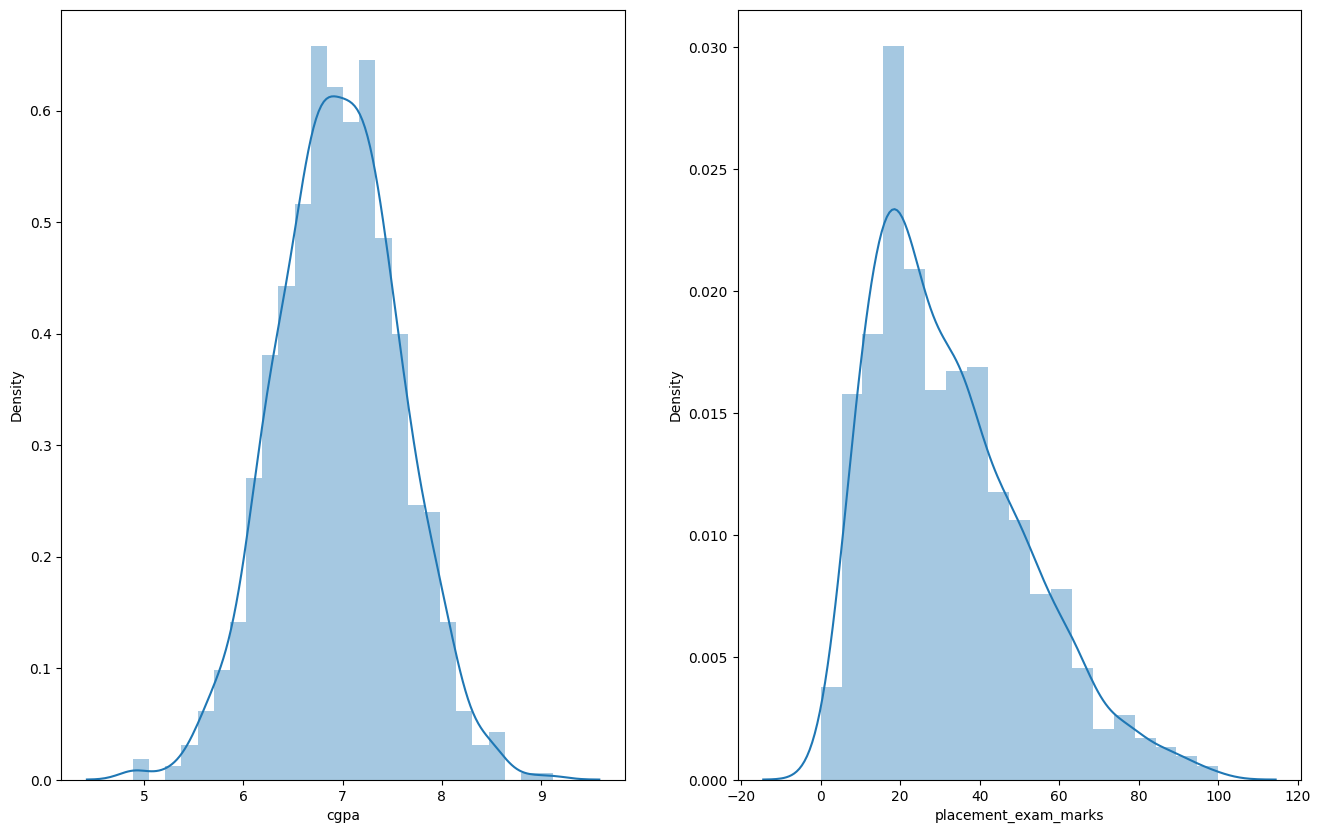

In [35]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)

sns.distplot(df['placement_exam_marks'])
plt.show()

In [36]:
df['cgpa'].skew()

-0.014529938929314918

In [37]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [38]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [39]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

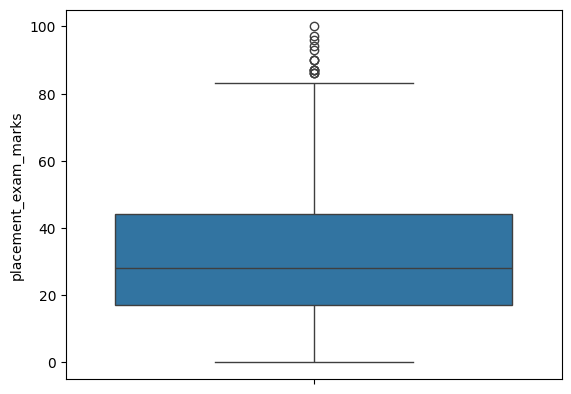

In [40]:
sns.boxplot(df['placement_exam_marks'])

In [41]:
# Finding the IQR 
precentile25 =df['placement_exam_marks'].quantile(0.25)
precentile75 =df['placement_exam_marks'].quantile(0.75)

In [42]:
precentile25

17.0

In [43]:
precentile75

44.0

In [44]:
iqr = precentile75 - precentile25

In [45]:
iqr

27.0